In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<AxesSubplot:>

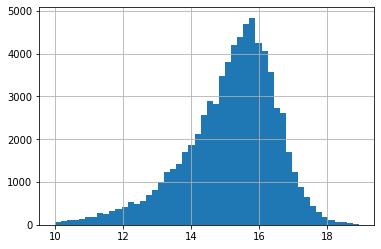

In [2]:
df0 = pd.read_csv('./data/processed/population_lt_100K.csv')
df0.per_square_meter_price.hist(bins=50)

In [3]:
realty_type_categories = ['realty_type_10', 'realty_type_100', 'realty_type_110']
points_types = ['amenity_points', 'building_points', 'catering_points', 'crossing_points', 'culture_points',
                'finance_points', 'healthcare_points', 'historic_points', 'hotels_points', 'leisure_points',
                'offices_points', 'shops_points']

columns = ['per_square_meter_price', 'city', 'osm_city_closest_dist', 'osm_city_nearest_population'] + realty_type_categories + points_types

df = df0[columns]

target_col = 'per_square_meter_price'
columns_to_scale = ['city', 'osm_city_closest_dist', 'osm_city_nearest_population'] + points_types
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

df.head(100)

C:\Users\super\AppData\Local\Temp\ipykernel_15596\1589001193.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])


,per_square_meter_price,city,osm_city_closest_dist,osm_city_nearest_population,realty_type_10,realty_type_100,realty_type_110,amenity_points,building_points,catering_points,crossing_points,culture_points,finance_points,healthcare_points,historic_points,hotels_points,leisure_points,offices_points,shops_points
0,14.106985,-1.035776,-0.334711,0.229347,1.0,0.0,0.0,1.676069,-0.091989,2.166967,0.396689,-0.245248,0.402155,0.809619,-0.534025,0.727874,0.220198,-0.155485,2.023752
1,14.457198,-1.018471,-0.467919,0.033856,1.0,0.0,0.0,-0.516951,0.136560,-0.388637,0.024545,0.009372,-0.418820,-0.544975,0.061956,0.727874,-0.645770,-0.187382,-0.583034
2,15.158512,-1.018471,-0.375306,0.033856,0.0,0.0,1.0,0.105759,-0.091989,0.009169,0.528490,0.028959,-0.289192,0.035565,-0.236035,-0.368843,-0.472576,-0.570141,0.207508
3,14.846334,-0.975209,-0.454965,1.162299,1.0,0.0,0.0,0.111775,0.067996,0.792727,1.179743,-0.245248,0.142900,-0.028939,-0.534025,-0.149500,0.090303,-0.442554,-0.027653
4,15.388342,-0.957904,-0.583894,-1.265168,1.0,0.0,0.0,0.177957,-0.091989,-0.123433,-0.339847,-0.245248,0.272528,-0.351461,0.061956,-0.368843,-0.645770,-0.570141,0.492703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.865347,-0.395499,-0.074637,-0.109950,1.0,0.0,0.0,-0.889975,-0.091989,-0.569458,-0.952335,-0.245248,-0.634866,-0.738488,-0.534025,-0.368843,-0.645770,-0.570141,-0.863226
96,15.958553,-0.334932,-0.349510,-1.112797,1.0,0.0,0.0,0.686352,0.067996,0.105607,-0.587943,-0.088559,-0.634866,1.712681,-0.534025,-0.368843,0.566586,0.801413,1.038077
97,15.450454,-0.326280,-0.487660,-0.279087,1.0,0.0,0.0,-0.435728,-0.091989,-0.424801,-0.246811,-0.245248,-0.332402,0.164574,-0.534025,-0.149500,-0.515875,-0.570141,-0.337866
98,14.000373,-0.317627,-0.424104,-0.469307,1.0,0.0,0.0,-0.760620,-0.091989,-0.569458,-0.975594,-0.245248,-0.634866,-0.544975,-0.236035,-0.368843,-0.645770,-0.570141,-0.753150


In [4]:
mape_mean = 0
baseline_mean = 0
n = 50
for _ in range(n):
       train, test = train_test_split(df, test_size=0.5)

       baseline = pd.Series([train.per_square_meter_price.mean()] * len(test))

       train_x, train_y = train.drop(target_col, axis=1), train[target_col]
       test_x, test_y = test.drop(target_col, axis=1), test[target_col]

       model = LinearRegression()
       model.fit(train_x, train_y)

       pred = model.predict(test_x)
       mape_mean += mean_absolute_percentage_error(2**test_y, 2**pred)
       baseline_mean += mean_absolute_percentage_error(2 ** test_y, 2 ** baseline)
print(mape_mean / n)
print(baseline_mean / n)

1.0569755191365227
1.2522207366858504


### Forecasting

In [5]:
df0 = pd.read_csv('./data/test/population_lt_100K.csv')
df0.set_index('Unnamed: 0', inplace=True)
df0.index.name='id'
print(df0.head(100))
print(df0.shape)

     city  floor          id        lat         lng  osm_city_closest_dist  \
id                                                                           
1       1    NaN   COL_70629  54.489840   53.490696              89.332957   
3       3    1.0   COL_16510  55.785270   37.853317               7.254629   
4       4    3.0  COL_141915  55.738186   36.981342              19.729642   
5       5    1.0  COL_120406  53.520756   49.281242               8.379783   
6       6    NaN   COL_51882  59.220380   39.867798               1.459868   
..    ...    ...         ...        ...         ...                    ...   
219    12    NaN  COL_221481  52.264015  104.314730               3.673733   
220     7    NaN   COL_67399  58.596066   49.648663               1.211811   
221    80    NaN  COL_151608  52.546820  103.895270               1.945834   
222    64    NaN   COL_12931  60.956882   76.512184               4.527883   
227    92    0.0  COL_161794  56.443657   85.003920             

In [6]:
columns.remove('per_square_meter_price') if 'per_square_meter_price' in columns else ''
df = df0[columns]

columns_to_scale = ['city', 'osm_city_closest_dist', 'osm_city_nearest_population'] + points_types
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

print(df.head(100))
print(df.shape)

         city  osm_city_closest_dist  osm_city_nearest_population  \
id                                                                  
1   -0.652355               1.408380                    -1.001361   
3   -0.648631              -0.355405                    -0.478896   
4   -0.646769              -0.087328                    -1.047757   
5   -0.644907              -0.331226                     1.651581   
6   -0.643045              -0.479928                    -0.238226   
..        ...                    ...                          ...   
219 -0.631873              -0.432355                     1.251692   
220 -0.641183              -0.485259                     0.648010   
221 -0.505256              -0.469485                    -0.642627   
222 -0.535048              -0.414000                    -0.397989   
227 -0.482911              -0.383867                     1.027829   

     realty_type_10  realty_type_100  realty_type_110  amenity_points  \
id                           

C:\Users\super\AppData\Local\Temp\ipykernel_15596\887400710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])


In [7]:
pred = model.predict(df)

res = pd.DataFrame(data=pred, columns=[target_col])
res['id'] = df0.index.tolist()
res.set_index('id', inplace=True)

print(res.head(100))
res.to_csv('./data/forecast/population_lt_100K.csv')

     per_square_meter_price
id                         
1                 14.804659
3                 15.068627
4                 15.276673
5                 15.536813
6                 15.492930
..                      ...
219               15.645691
220               15.991900
221               15.801325
222               14.880330
227               14.726716

[100 rows x 1 columns]
